In [19]:
#importing necessary libraries
import numpy as np
import pandas as pd #data manipulation 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')  # Suppress warnings

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 143F-DF3F

 Directory of C:\Users\hi\OneDrive\Desktop\Green Skills AI SHELL\AIR QUALITY PREDICTION

24-02-2025  17:56    <DIR>          .
24-02-2025  17:56    <DIR>          ..
24-02-2025  17:55    <DIR>          .ipynb_checkpoints
24-02-2025  17:26         2,574,056 air quality data.csv
24-02-2025  17:56               617 AQI_Prediction_Model.ipynb
               2 File(s)      2,574,673 bytes
               3 Dir(s)  23,269,736,448 bytes free


In [22]:
# load the dataset
df=pd.read_csv('air quality data.csv')
display(df.head()) #displaying first 5 rows

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [8]:
df.shape #rows and cols

(29531, 16)

In [9]:
df.info

<bound method DataFrame.info of                 City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Be

In [24]:
# check for duplicate rows
df.duplicated().sum()

0

In [26]:
# check for missing values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [38]:
# Drop the rows where 'AQI' has missing values

# df.dropna(subset=['AQI'], inplace = True) or

if 'AQI' in df.columns:
    df.dropna(subset=['AQI'], inplace=True)
    print(f"Rows with missing 'AQI' values have been dropped. New shape: {df.shape}")
else:
    print("'AQI' column not found in the dataset.")

Rows with missing 'AQI' values have been dropped. New shape: (24850, 16)


In [31]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [33]:
#Summary of statistics in dataset
#df.describe()
display(df.describe().T) #changing rows into columns

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [34]:
# percentage of null values
null_values_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

### 🔥 What does the heatmap look like?
##### Each row represents a data entry (like a day’s air quality reading).
##### Each column corresponds to a feature (like temperature, AQI, etc.).
##### Yellow or white cells = missing data (NaN).
##### Purple or black cells = non-missing data.
##### The result is a quick visual summary of which columns have the most missing values and whether the gaps follow a pattern — like if certain dates have more missing data than others.

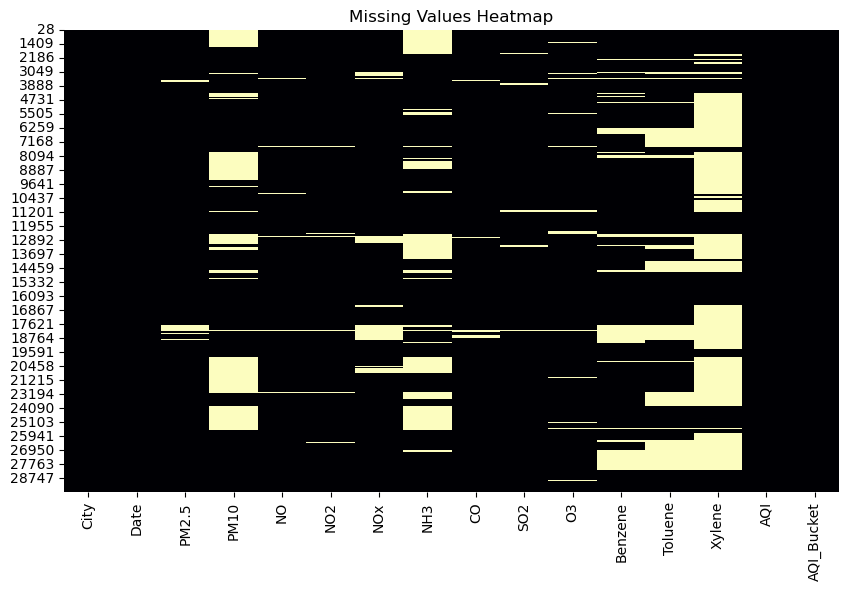

In [46]:
# Visualizing missing values 
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title('Missing Values Heatmap')
plt.show()